# Data exploration

In [1]:
# at first i will open the files and look how they are structured

In [2]:
import pandas as pd
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline  

features = pd.read_pickle(r'phase_2_TRAIN_ab71fa4d86c94323_05dcbf4_MLPC2021_features_pandas.pkl')

features

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,RT-47-029,0.106072,0.048556,4.600393,71.847145,1.7,0.541098,0.146353,3761.501709,1075.834717,...,0.003238,0.357967,-0.189399,-0.294453,-0.048271,-0.518002,0.364257,-0.344354,0.0,0.741726
3751,RT-47-030,0.097130,0.045978,4.032829,81.727577,2.4,0.506956,0.129266,3283.780029,956.233765,...,0.002562,0.223821,-0.081319,-0.211686,-0.043546,-0.427122,0.318351,-0.382207,0.0,0.729813
3752,RT-47-031,0.142735,0.059378,4.094213,27.877666,0.9,0.553664,0.155784,5419.066406,1376.261963,...,0.009679,0.190541,-0.334320,-0.268202,-0.223166,-0.392003,0.249261,-0.183019,0.0,0.752923
3753,RT-47-032,0.134667,0.057092,5.675084,57.549480,1.4,0.524951,0.150398,4481.284668,1550.097534,...,0.007357,0.292983,-0.208947,-0.286899,-0.110805,-0.460086,0.320651,-0.221194,0.0,0.744074


In [3]:

raw = pd.read_pickle(r'phase_2_TRAIN_8d8d624e3190984c_05dcbf4_MLPC2021_raw_annotations_pandas.pkl')

raw

,student,pianist,piece,arousal,valence
0,student_000,GG,01,30,-1
1,student_000,GG,02,30,1
2,student_000,GG,03,70,-2
3,student_000,GG,04,30,0
4,student_000,GG,05,90,2
...,...,...,...,...,...
5737,student_165,RT,39,80,-4
5738,student_165,RT,41,100,4
5739,student_165,RT,45,50,1
5740,student_165,RT,46,40,2


# Questions we should answer

1.) How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt? <br>
2.) How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?<br>
3.) Derive discrete quadrant-based class labels from the raw annotations. Any ideas on how to aggregate conflicting annotations? Outliers?<br>
4.) How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much?<br>
5.) How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?<br>
6.) Which features seem useful for classification? Which ones are correlated with the labels?<br>
7.) Any interesting conclusions you can draw from this for the next project phase?<br>

# 1) How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

In [4]:
raw_gg = raw.loc[raw["pianist"] == "GG"]

In [5]:
raw_gg

,student,pianist,piece,arousal,valence
0,student_000,GG,01,30,-1
1,student_000,GG,02,30,1
2,student_000,GG,03,70,-2
3,student_000,GG,04,30,0
4,student_000,GG,05,90,2
...,...,...,...,...,...
1021,student_029,GG,39,40,0
1022,student_029,GG,41,30,0
1023,student_029,GG,45,30,0
1024,student_029,GG,46,30,0


In [6]:
alt.Chart(raw_gg).mark_circle(size=60).encode(
    x=alt.X('valence',
        scale=alt.Scale(domain=(-5, 5))
    ),
    y=alt.X('arousal',
        scale=alt.Scale(domain=(0, 100))
    )
    
    ,column='piece'
).configure_axis(
    grid=False
).properties(
    width=200,
    height=200
)

alt.Chart(...)

From the plots you can see, that there are some tendencies in most of the annotations, therefore i would say, that we have some consistency in our annotations which we can try to predict, but the consistency is not very strong. <br>
Different Annotators do not agree in their annotations, but there is some general agreement, that the pices should have higher or lower valence or arousal values.

# 2) How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?

features i can look at:

score_mode:
A binary feature representing the mode of tonality of the segment. It is 0 if the mode is major and 1 if the mode is minor. The mode was computed/estimated using the Krumhansl-Schmuckler key identification algorithm

midlevel_features_minorness: 
says how minor the piece is percieved

i decided to only look at midlevel_features_minorness, because score mode is not provided for the test set and the question 
is about "the" major/minor feature, not the features.

In [7]:
#because i need to compare a feature from one dataframe to a feature of another dataframe i will merge the dataframes
id_list = []
for pianist,piece,student in zip(raw["pianist"],raw["piece"],raw["student"]):
    id_list.append("-".join([pianist,piece,"".join(list(map(lambda i:i, student))[8:])]))
raw["id"] = id_list


full = pd.merge(raw, features, on="id", how= "inner")
compare = full[["valence","arousal","midlevel_features_minorness"]]

In [8]:
# at first i will look at the scatterplot matrix and look for a corelation there

# sampling to see the data in the scatterplots more clearly
number_of_samples = 100

alt.Chart(compare.sample(n=number_of_samples, random_state=1)).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N',
    
).properties(width=250,height=250
            ).repeat(
    row=["valence","arousal","midlevel_features_minorness",],
    column=["valence","arousal","midlevel_features_minorness",][::-1]
)

alt.RepeatChart(...)

In [9]:
# to support the scatterplots i also calculated the pearson corelation coefficient of the different columns
for element in ["valence","arousal","midlevel_features_minorness",]:
    for el in ["valence","arousal","midlevel_features_minorness",]:
        if element != el:
            c = compare[element].corr(compare[el], method = "pearson")
            print(f"correlation {element} {el}= {c}")

correlation valence arousal= 0.17911887546435667
correlation valence midlevel_features_minorness= -0.26149557211204677
correlation arousal valence= 0.17911887546435665
correlation arousal midlevel_features_minorness= -0.29796802396374666
correlation midlevel_features_minorness valence= -0.2614955721120467
correlation midlevel_features_minorness arousal= -0.2979680239637466


You can see, that there barely exists a corelation between the minoriness|arousal and  minoriness|valence, and the pearson corelation coefficient also supports that, because it is between -0.25 and -0.3, this means, that the linear corelation is very very weak.


# 3) Derive discrete quadrant-based class labels from the raw annotations. Any ideas on how to aggregate conflicting annotations? Outliers?

The simplest way would be to set the quadrants borders to the mean/median of the valence/arousal feature, and naming the quadrants like in the task slides. (Angry, Happy, Sad, Relaxed) \
The aggregation of conflicting annotation could be done via mean, which is heavily influenced by outliers, by median which is not influenced by outliers that much or even by classifying every annotation an then doing a majority vote. This would especially make sense, if the annotators used the same quadrants and the continious part was just to indicate the definiteness of that class. (E.g. "Very happy" or "A bit happy") <br /><br />
We would go with the median of the annotation, because we did not think about the quadrants when annotating the music and we want to get rid of big outliers. <br /><br />
Another problem is, that we can not even make a balanced split. We have 11 classes in both valence / arousal, so we will have to include the middle classes in two of the quadrants. \
We take the definition of the slides, with our values:
* Happy (V > 0, A >= 50)
* Angry (V <= 0, A > 50)
* Sad (V < 0, A <= 0)
* Relaxed (V >= 0, A < 0)

In [10]:
def getQuadrantClass(v, a, border_v=0, border_a=50):
    if v > border_v and a >= border_a:
        return 0
    elif v <= border_v and a > border_a:
        return 1
    elif v < border_v and a <= border_a:
        return 2
    else:
        return 3
    
def getClassName(class_id):
    if class_id == 0:
        return "Happy"
    if class_id == 1:
        return "Angry"
    if class_id == 2:
        return "Sad"
    
    return "Relaxed"
    
raw_grouped = raw.copy()
raw_grouped = raw_grouped.groupby(by=["pianist", "piece"]).median()

raw_annotated = raw_grouped.copy()

raw_annotated["class_id"] = raw_annotated.apply(lambda x: getQuadrantClass(x["valence"], x["arousal"]), axis=1)
raw_annotated["class_name"] = raw_annotated.apply(lambda x: getClassName(x["class_id"]), axis=1)
raw_annotated

arousal  valence  class_id class_name
pianist piece                                       
AH      01        35.0      3.0         3    Relaxed
        02        40.0      2.0         3    Relaxed
        03        90.0     -2.0         1      Angry
        04        50.0     -1.0         2        Sad
        05        70.0      4.0         0      Happy
...                ...      ...       ...        ...
SR      39        80.0      0.0         1      Angry
        41        80.0      3.0         0      Happy
        45        40.0      1.0         3    Relaxed
        46        30.0      0.0         3    Relaxed
        47        20.0     -2.0         2        Sad

[216 rows x 4 columns]

A second possibility would be to set the borders of the quadrants to the medians of the variables.\
Although, this will be a step into the direction of balancedness, it will just balance the number of items in Angry and Happy compared to Sad and Relaxed. (Arousal) \
And Angry and Sad compared to Happy and Relaxed. (Valence)

In [11]:
raw_annotated2 = raw_grouped.copy()
median_arousal = raw_annotated2["arousal"].median()
median_valence = raw_annotated2["valence"].median()
print("Arousal Median (border):", median_arousal)
print("Valence Median (border):", median_valence)
raw_annotated2["class_id"] = raw_annotated2.apply(lambda x: getQuadrantClass(x["valence"], x["arousal"], median_valence, median_arousal), axis=1)
raw_annotated2["class_name"] = raw_annotated2.apply(lambda x: getClassName(x["class_id"]), axis=1)
raw_annotated2

Arousal Median (border): 50.0
Valence Median (border): 1.0


arousal  valence  class_id class_name
pianist piece                                       
AH      01        35.0      3.0         3    Relaxed
        02        40.0      2.0         3    Relaxed
        03        90.0     -2.0         1      Angry
        04        50.0     -1.0         2        Sad
        05        70.0      4.0         0      Happy
...                ...      ...       ...        ...
SR      39        80.0      0.0         1      Angry
        41        80.0      3.0         0      Happy
        45        40.0      1.0         3    Relaxed
        46        30.0      0.0         2        Sad
        47        20.0     -2.0         2        Sad

[216 rows x 4 columns]

# 4) How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much?

In [12]:
def printStatistics(df, comment=""):
    ax = sns.barplot(x="class_name", y="class_id", data=df, estimator=lambda x: len(x) / len(df) * 100)
    _ = ax.set(ylabel="Percent")
    print(comment)
    print()
    for class_name in ["Relaxed","Angry", "Happy", "Sad"]:
        print(class_name, "makes up", round(len(df[df.class_name==class_name])/len(df)*100), "% of the dataset.")

We have an unbalanced dataset.
However, we think, that the unbalancedness will be small enough, that our algorithm will be able to work with it.

Relaxed makes up 18 % of the dataset.
Angry makes up 15 % of the dataset.
Happy makes up 38 % of the dataset.
Sad makes up 29 % of the dataset.


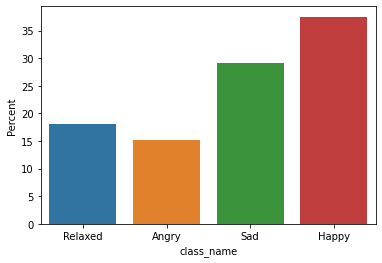

In [13]:
printStatistics(raw_annotated, "We have an unbalanced dataset.\nHowever, we think, that the unbalancedness will be small enough, that our algorithm will be able to work with it.")

Moving the axis borders to the median helps a bit, but not drastically. If we want to have a balanced dataset, we would have to create borders, that in each quadrant are equally many samples.

Relaxed makes up 15 % of the dataset.
Angry makes up 18 % of the dataset.
Happy makes up 33 % of the dataset.
Sad makes up 34 % of the dataset.


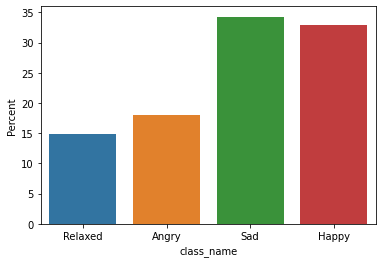

In [14]:
printStatistics(raw_annotated2, "Moving the axis borders to the median helps a bit, but not drastically. If we want to have a balanced dataset, we would have to create borders, that in each quadrant are equally many samples.")

# 5) How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?

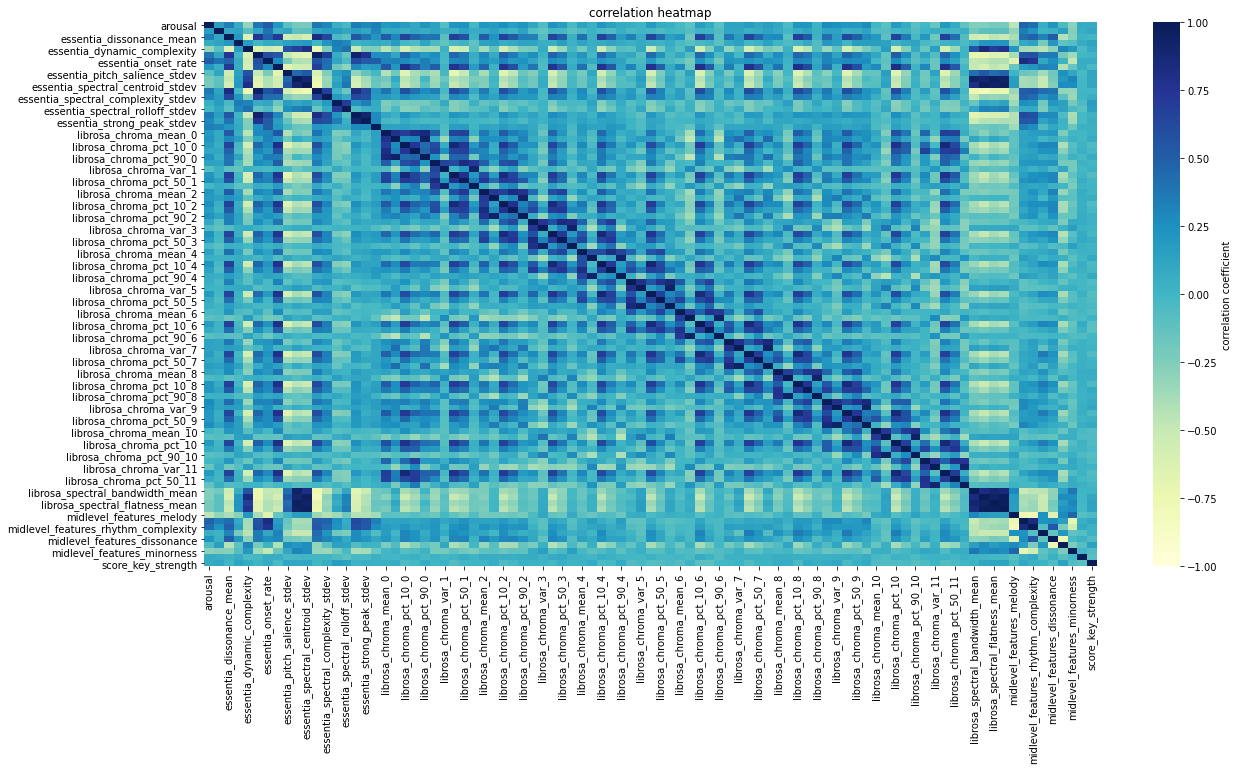

In [15]:
corr = full.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, vmin= -1, vmax=1, cmap="YlGnBu", cbar_kws={'label': 'correlation coefficient'})
ax.set_title('correlation heatmap')
plt.show()

Way too small screen for way too much information.

BUT I see some highly correlated clusters...namely the spectral analysis coefficents, from essentia as well as librosa. These are highly correlated among each other, as well as with the analysis of the respective other library of course. So these features we could just merge to one, for simplicity's sake.

In [16]:
cor_target = abs(corr["librosa_spectral_bandwidth_mean"])
relevant_features = cor_target[cor_target>0.75]
relevant_features

essentia_spectral_centroid_mean     0.933015
essentia_spectral_centroid_stdev    0.810415
librosa_spectral_bandwidth_mean     1.000000
librosa_spectral_bandwidth_stdev    0.835161
librosa_spectral_flatness_mean      0.902722
librosa_spectral_flatness_stdev     0.854788
Name: librosa_spectral_bandwidth_mean, dtype: float64

In [17]:
cor_target = abs(corr["essentia_loudness"])
relevant_features = cor_target[cor_target>0.7]
relevant_features

essentia_dissonance_mean              0.736889
essentia_loudness                     1.000000
essentia_spectral_complexity_mean     0.951801
essentia_spectral_complexity_stdev    0.701837
essentia_strong_peak_mean             0.920378
essentia_strong_peak_stdev            0.776046
librosa_spectral_bandwidth_mean       0.721533
librosa_spectral_bandwidth_stdev      0.721208
Name: essentia_loudness, dtype: float64

Some more strong correlations between the loudness of a piece and some of it's other analytical parameters.

# 6) Which features seem useful for classification? Which ones are correlated with the labels?

Since the class labels are just based off threshholds of the numerical values in arousal and valence, i will rather look at correlations of these two.

In [18]:
corr = full.corr(method='spearman')

cor_target = abs(corr["arousal"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

arousal                                1.000000
essentia_onset_rate                    0.508604
midlevel_features_melody               0.465926
midlevel_features_articulation         0.484098
midlevel_features_rhythm_complexity    0.414457
Name: arousal, dtype: float64

In [19]:
cor_target = abs(corr["valence"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

valence                           1.000000
essentia_onset_rate               0.390906
librosa_bpm                       0.297859
midlevel_features_melody          0.317817
midlevel_features_articulation    0.350300
midlevel_features_minorness       0.268225
Name: valence, dtype: float64

Arousal seems to have a very high correlation with the feature 'essentia_onset_rate', but also with some other midelevel features.
Same is true for valence. It's correlation is also highest for essentia_onset_rate...and shares high correlations with midlevel_features melody and articulation with arousal...this will make things difficult.

This maybe also has something to do with the imbalance in our dataset regarding the class labels.

# 7) Any interesting conclusions you can draw from this for the next project phase?

In general, it is always good and sometimes even necessary to know the data which you want to work with and therefore the insights we gained from the Data Exploration Phase are also beneficial for us in the next phase.

## Conclusions:

We have a weak consistency but some tendencies in the annotation (because the annotations are highly subjective and people have different perceptions)\
Surprisingly it seems that the emotion annotations are not really related to the major/minor feature. We would have suggested the opposite since it is known that the major and the minor feature are used to convey certain moods. For example, normally the major is referred to as happy and the minor as sad.\
There are outliers which need to be neglected when it comes to label the raw annotations. This can be done by taking the median or label it by majority vote.\
The classes are unbalanced but we think that this will not be a big problem for our algorithm. If our guess is wrong, we know that we can try to solve the bias by rebalance the classes in our training set. This can be achieved by leave some samples out or by changing the borders.